<a href="https://colab.research.google.com/github/Rociosamudio/DataScience-Prediccion-de-precio-de-computadoras/blob/main/tp_final_samudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduccion
Como parte de mi exploración en el mundo del data science y con la meta de alcanzar la independencia económica, he decidido analizar un conjunto de datos sobre computadoras portátiles. Este proyecto surge de mi interés en comprender el comportamiento del mercado de dispositivos electrónicos y, específicamente, en evaluar qué factores influyen en el precio y la demanda.

Mi objetivo principal es identificar los modelos y características más populares entre los consumidores, con el fin de tomar decisiones informadas al momento de abastecer mi futura tienda de computadoras.

Para lograr esto, he formulado las siguientes hipótesis:


H0: Asumo que los productos más caros son los más demandados.

H1: Creo que los equipos más pesados (gr) tienden a ser más costosos.

H2: Las notebooks, las gaming y las netbooks son los tipos de computadoras más demandados por los consumidores.

H3: Existe una relación directa entre el precio de una computadora y el tamaño de su pantalla.

H4: A mayor precio, mayor será la capacidad de almacenamiento primario (por ejemplo, SSD).

H5: Un modelo que considere la RAM, el peso y el almacenamiento primario podrá predecir precios arriba de los 1000 euros.


**Columnas de mi Dataset**

Company: Nombre de la compañía
Product: Nombre específico del modelo del dispositivo.(EJ, MacBook Pro)
TypeName: Categoría general del dispositivo (Ej, Notebook,etc)
Inches: Tamaño de la pantalla en pulgadas.
Ram: Cantidad de memoria RAM en GB.
OS: Sistema operativo instalado (EJ., Windows, macOS).
Weight: Peso del dispositivo en kilogramos.
Price_euros: Precio del dispositivo en euros.
Screen: Tipo de pantalla (EJ., Standard, Full HD).
ScreenW: Resolución horizontal de la pantalla.
ScreenH: Resolución vertical de la pantalla.
Touchscreen: Indica si la pantalla es táctil (Sí/No).
IPSpanel: Indica si la pantalla es IPS (Sí/No).
RetinaDisplay: Indica si la pantalla es Retina Display (Sí/No).
CPU_company: Compañía que fabrica el procesador (EJ, Intel, AMD).
CPU_freq: Frecuencia del procesador en GHz.
CPU_model: Modelo del procesador (EJ., Core i5, Ryzen 5).
PrimaryStorage: Capacidad de almacenamiento primario en GB.
SecondaryStorage: Capacidad de almacenamiento secundario en GB.
PrimaryStorageType: Tipo de almacenamiento primario (EJ., SSD, HDD).
SecondaryStorageType: Tipo de almacenamiento secundario (EJ., SSD, HDD).
GPU_company: Compañía que fabrica la tarjeta gráfica.
GPU_model: Modelo de la tarjeta gráfica.

#Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #graficar en el lienzo
import seaborn as sns #estilo al grafico
import missingno as msno #Nulos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#EDA

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datascience_LizRocioSamudioRuiz/TP_LizRocioSamudioRuiz/computadoras_prices.csv')
df.head() #me trae las primeras 5 columnas

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.columns #me trae las columnas

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [ ]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [ ]:
df.describe(include="all")  #calcula y devuelve un resumen estadístico el max, min percentil etc.

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275.000000,1275.000000,1275,1275.000000,1275.000000,1275,1275.000000,...,1275,1275,1275.000000,1275,1275.000000,1275.000000,1275,1275,1275,1275
unique,19,618,6,NaN,NaN,9,NaN,NaN,4,NaN,...,2,3,NaN,93,NaN,NaN,4,4,4,110
top,Dell,XPS 13,Notebook,NaN,NaN,Windows 10,NaN,NaN,Full HD,NaN,...,No,Intel,NaN,Core i5 7200U,NaN,NaN,SSD,No,Intel,HD Graphics 620
freq,291,30,707,NaN,NaN,1048,NaN,NaN,835,NaN,...,1258,1214,NaN,193,NaN,NaN,837,1067,704,279
mean,NaN,NaN,NaN,15.022902,8.440784,NaN,2.040525,1134.969059,NaN,1900.043922,...,NaN,NaN,2.302980,NaN,444.517647,176.069020,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429470,5.097809,NaN,0.669196,700.752504,NaN,493.346186,...,NaN,NaN,0.503846,NaN,365.537726,415.960655,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10.100000,2.000000,NaN,0.690000,174.000000,NaN,1366.000000,...,NaN,NaN,0.900000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,4.000000,NaN,1.500000,609.000000,NaN,1920.000000,...,NaN,NaN,2.000000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.040000,989.000000,NaN,1920.000000,...,NaN,NaN,2.500000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.310000,1496.500000,NaN,1920.000000,...,NaN,NaN,2.700000,NaN,512.000000,0.000000,NaN,NaN,NaN,NaN


In [ ]:
df.shape #me trae las filas y columnas

(1275, 23)

In [ ]:
df.duplicated() #me trae los duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
1270,False
1271,False
1272,False
1273,False


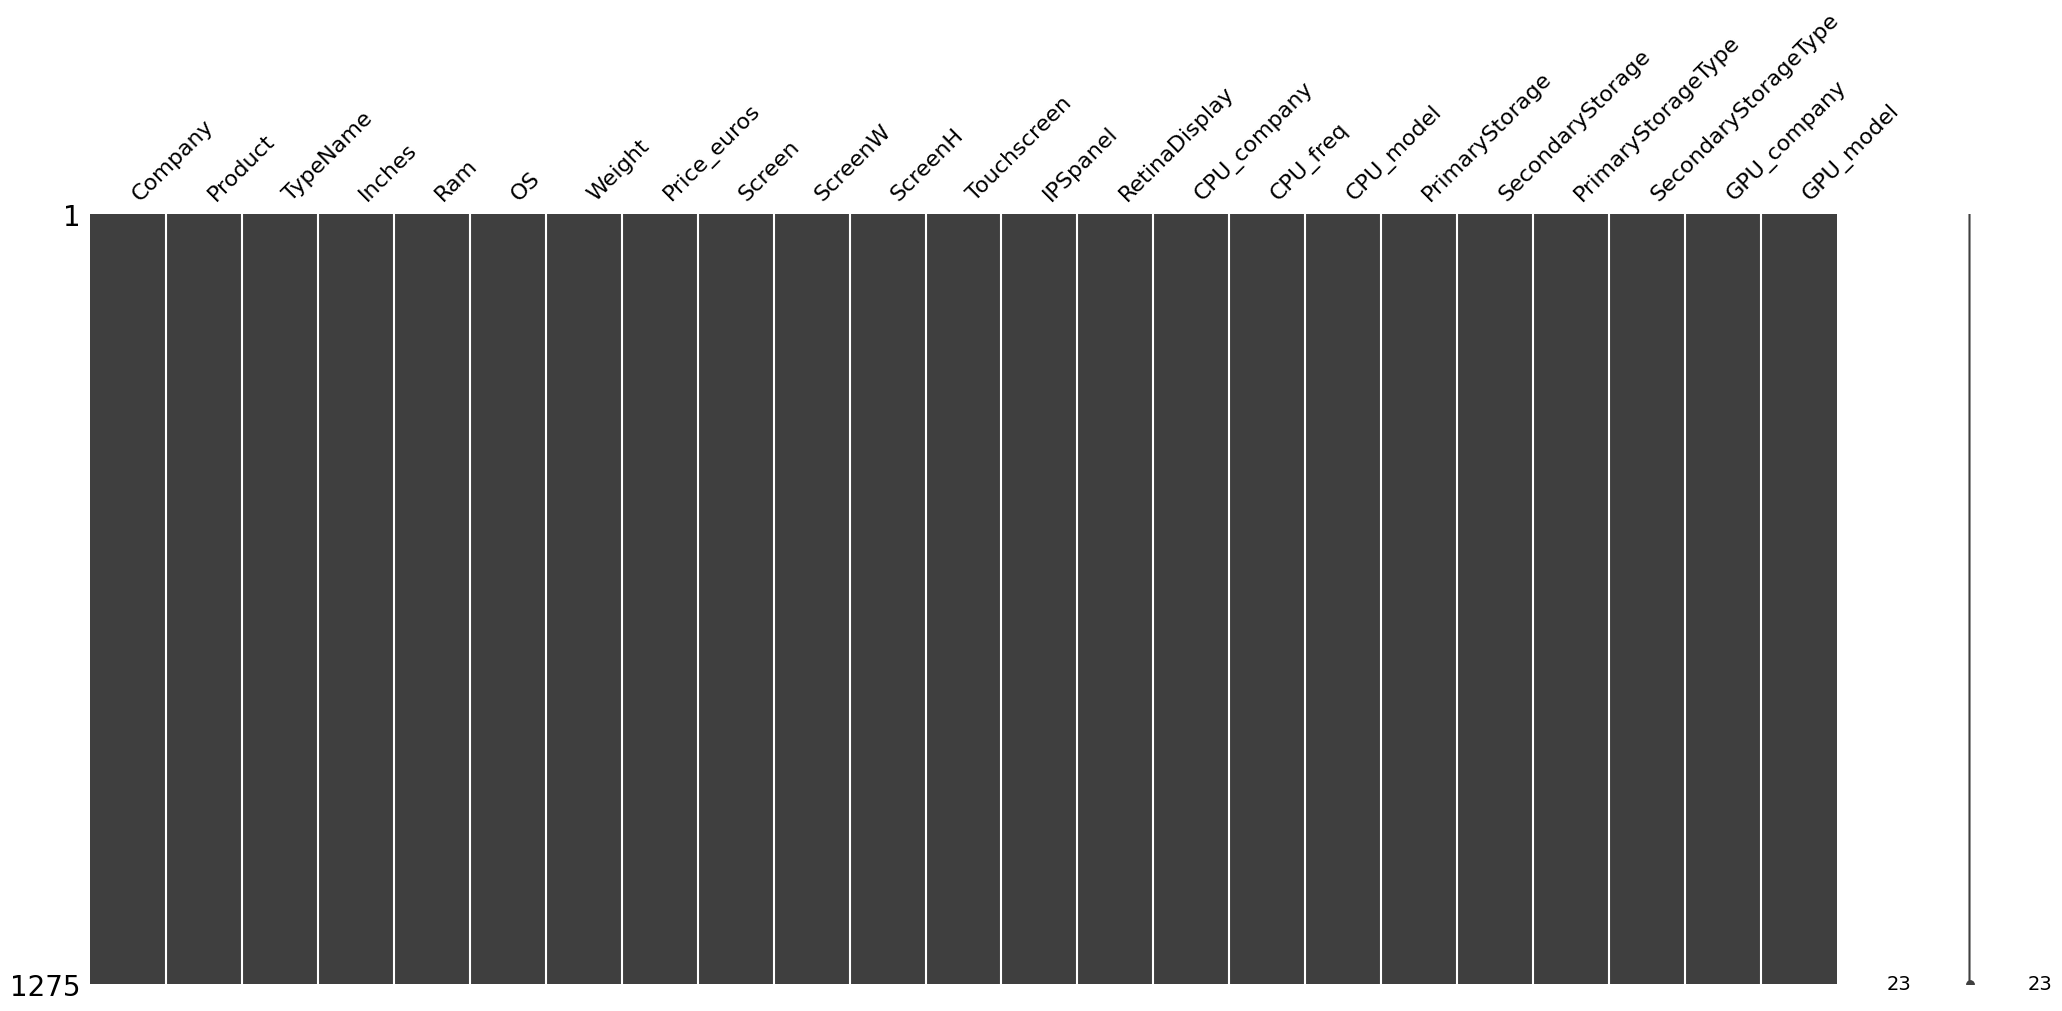

In [ ]:
%matplotlib inline
msno.matrix(df)
plt.show()
# En este caso no tengo Filas en Blanco correspode a los NAN vistos anteriormente
# si tuvieras filas faltantes NaN las veria en lineas color blanco

##H0
Verdadero, a mayor costo menor frecuencia de ventas.
Ademas en el Histograma podemos notar que la mayoria de los precios estan concentrados en el rango bajo. Hay una alta frecuencia de computadoras en el rango de precios entre 500 y 1500 euros.
El sesgoo es positivo, pero se observa la cola derecha más larga. Esto nos sugiere la existencia de algunos valores atípicos o extremos,Estos valores pueden influir en los calculos estadísticos, como la media. es por ello que aplicare la transformacion logaritmica para mejorar la distribución de los datos.

In [ ]:
df['Price_euros']

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [ ]:
max_price = df['Price_euros'].max()
min_price = df['Price_euros'].min()

print("Maximum Price:", max_price)
print("Minimum Price:", min_price)

Maximum Price: 6099.0
Minimum Price: 174.0


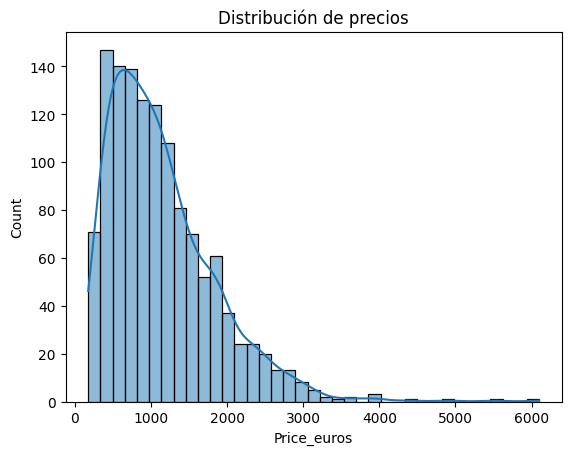

In [ ]:
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribución de precios')
plt.show()

Calculo de IQR. Al notar que tengo muchos datos fuera de mi indice de confiaza debo aplicar una transformacion Logaritmica para no perderme los datos outliers.

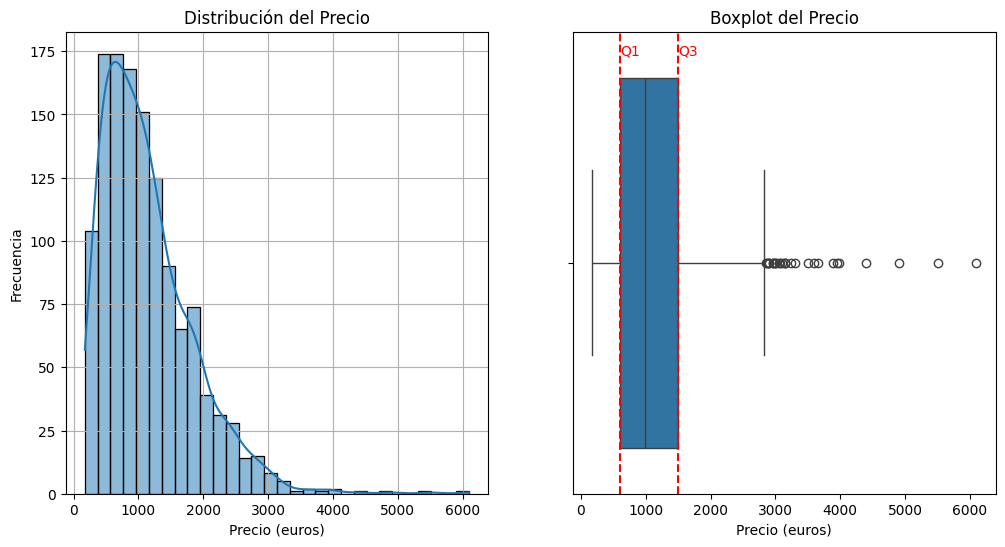

In [ ]:
# Calcular el IQR
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # Crear una figura con dos subplots: histograma y boxplot


sns.histplot(df['Price_euros'], bins=30, kde=True, ax=ax1) # Histograma
ax1.set_title('Distribución del Precio')
ax1.set_xlabel('Precio (euros)')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)


sns.boxplot(x=df['Price_euros'], ax=ax2)# Boxplot
ax2.set_title('Boxplot del Precio')
ax2.set_xlabel('Precio (euros)')


plt.axvline(Q1, color='r', linestyle='--')# Mostrar los límites del IQR
plt.axvline(Q3, color='r', linestyle='--')
plt.text(Q1, ax2.get_ylim()[1]*0.9, 'Q1', color='red')
plt.text(Q3, ax2.get_ylim()[1]*0.9, 'Q3', color='red')

plt.show()

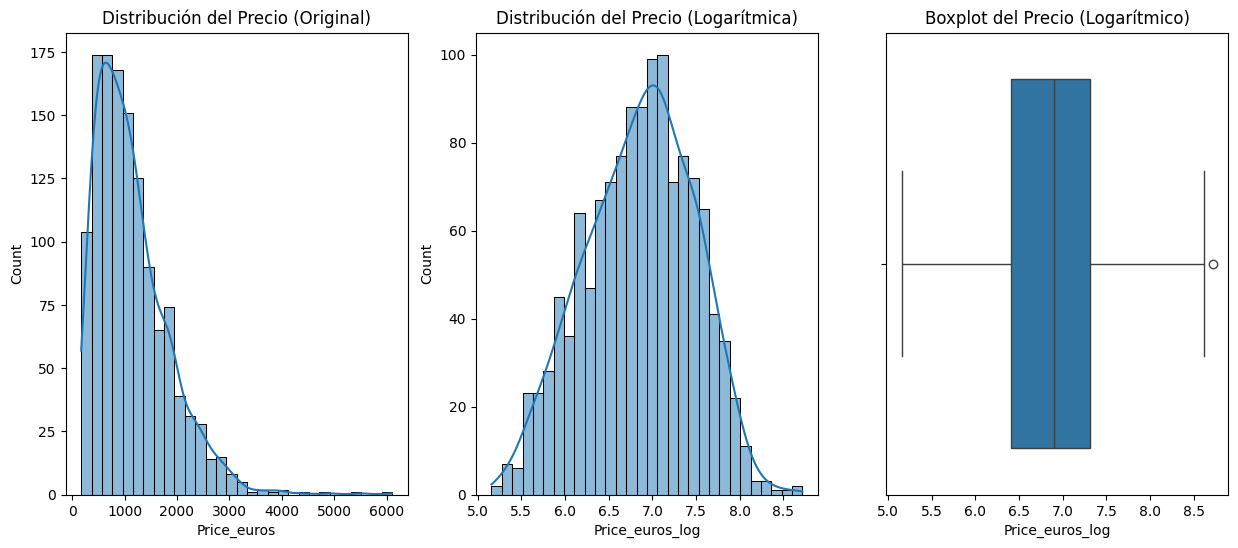

In [ ]:
# Aplicar la transformación logarítmica a la columna 'Precio_euros'
df['Price_euros_log'] = np.log(df['Price_euros'])

plt.figure(figsize=(15, 6))

# Subplot 1: Histograma del precio original
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Price_euros', bins=30, kde=True)
plt.title('Distribución del Precio (Original)')

# Subplot 2: Histograma del precio transformado
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Price_euros_log', bins=30, kde=True)
plt.title('Distribución del Precio (Logarítmica)')

# Subplot 3: Boxplot del precio transformado
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Price_euros_log'])
plt.title('Boxplot del Precio (Logarítmico)')


plt.show()

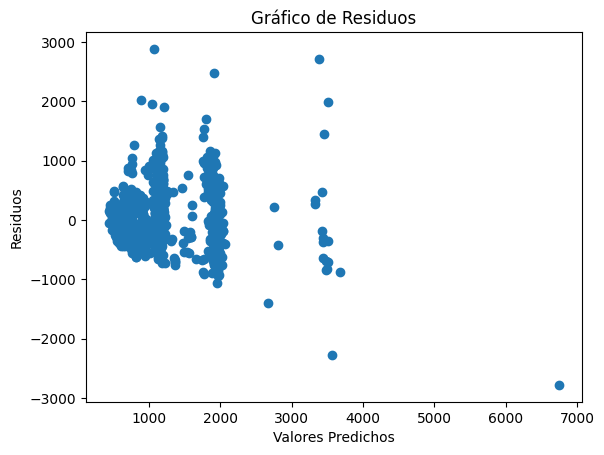

In [ ]:
#Grafico de residuos, para ver mi intervalo de confianza
X = df[['Ram', 'Weight', 'PrimaryStorage']] #valores predichps
y = df['Price_euros'] #Residuos, es decir, la diferencia entre el valor real y el valor predicho

# Agregar una columna de unos para la intersección
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Crear un DataFrame con los residuos
df_residuals = pd.DataFrame({'residuals': residuals})

# Calcular las predicciones
y_pred = model.predict(X)

# Graficar los residuos
plt.scatter(y_pred, residuals)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

Aplique una transformación logarítmica al precio para intentar mitigar la heterocedasticidad en el modelo de regresión lineal. Sin embargo, el gráfico de residuos resultante no muestra una mejora significativa. Esto indica que la transformación logarítmica, en este caso particular, no ha sido suficiente para resolver el problema de la varianza no constante de los errores.

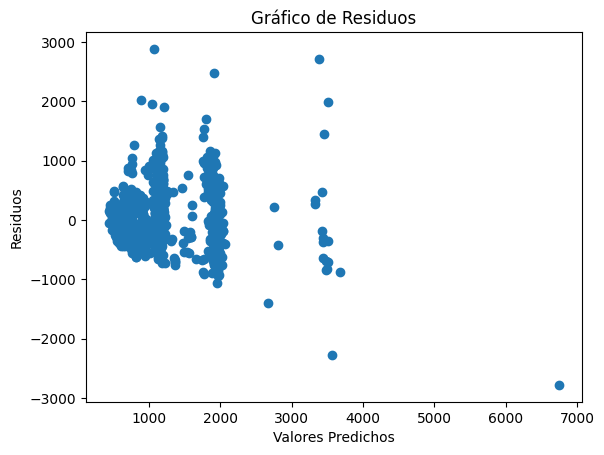

In [ ]:
df['log_precio'] = np.log(df['Price_euros'])

# Ajustar el modelo con la variable transformada
X = df[['Ram', 'Weight', 'PrimaryStorage']]
y = df['log_precio']


# Graficar los residuos
plt.scatter(y_pred, residuals)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

Para mitigar el problema de los outliers decido calcular el Z-score de los residuos.
La eliminación de los outliers ha tenido un impacto positivo en la limpieza de los datos y ha hecho que la distribución sea más representativa de la mayoría de las observaciones.



In [ ]:
import scipy.stats as stats
# Calcular el Z-score de los residuos
z_scores = np.abs(stats.zscore(residuals))


threshold = 3 # Definir un umbral 3 desviaciones estándar en mi eleccion

df_clean = df[(z_scores < threshold)]
# Eliminar los outliers

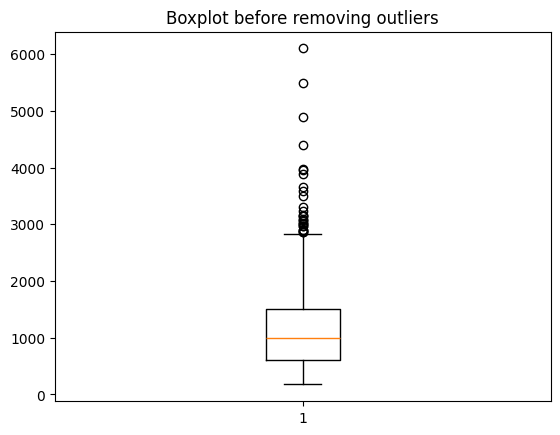

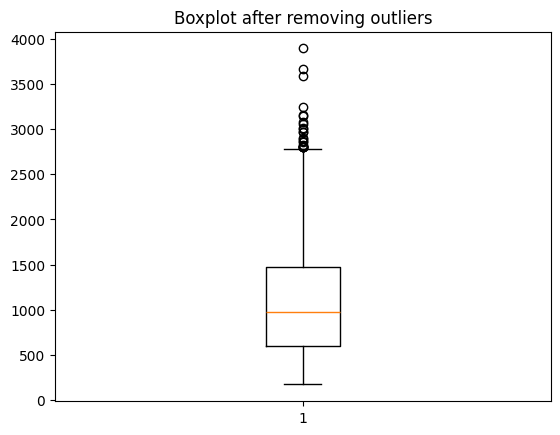

In [ ]:
plt.boxplot(df['Price_euros'])  # Changed to 'Price_euros'
plt.title('Boxplot before removing outliers')
plt.show()

# Boxplot after removing outliers
plt.boxplot(df_clean['Price_euros'])  # Changed to 'Price_euros'
plt.title('Boxplot after removing outliers')
plt.show()

##H1
Como podemos observar, el peso en el producto no es determinante en el precio por lo tanto por lo tanto esta hipotesis se rechaza.

 El peso en el producto no es determinante en el precio.
en este grafico de dispersion visualizamos que el peso influye en el precio, pero no de manera lineal. A medida que aumenta el peso, el precio tiende a aumentar, pero no existe una relación completamente lineal. Es decir, no todas las computadoras más pesadas son las más caras, y viceversa.

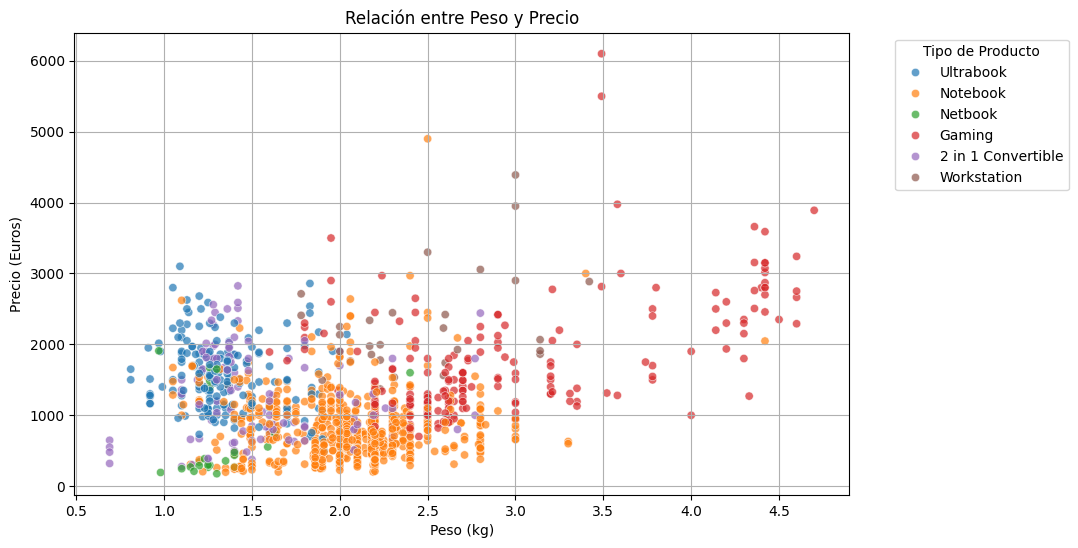

In [ ]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño
sns.scatterplot(data=df, x='Weight', y='Price_euros', hue='TypeName', alpha=0.7)
plt.title('Relación entre Peso y Precio')
plt.xlabel('Peso (kg)')
plt.ylabel('Precio (Euros)')
plt.grid()
plt.legend(title='Tipo de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##H3
 Como se puede observar, la demanda de computadoras portatiles son por mucho las Notebooks. se rechaza la hipotesis inicial, Ademas podemos observar las preferencias de los consumidores por notebooks, seguidas por gaming.

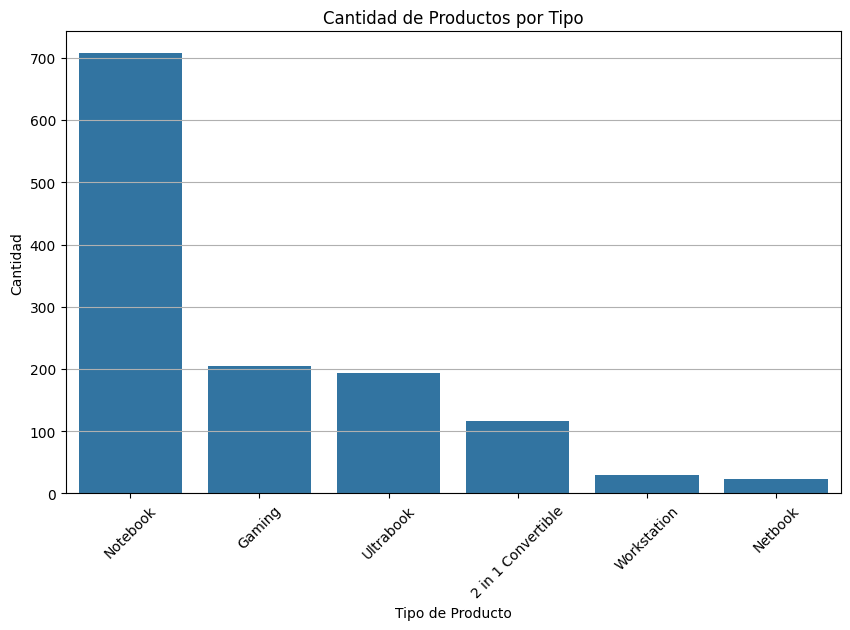

In [ ]:
# 3. Gráfico de barras de productos por tipo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TypeName', order=df['TypeName'].value_counts().index)
plt.title('Cantidad de Productos por Tipo')
plt.xlabel('Tipo de Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##H4
Se confirma la Hipoteisis inicial.
la tendencia General es que a medida que aumenta el tamaño de la pantalla, el precio también tiende a subir. Esto sugiere que, en general, las computadoras portátiles con pantallas más grandes suelen ser más caras.

 Los puntos están bastante dispersos, lo que indica una gran variabilidad en los precios para un tamaño de pantalla dado.

Los portátiles gaming tienden a concentrarse en la parte superior derecha del gráfico, indicando que suelen tener pantallas grandes y precios elevados

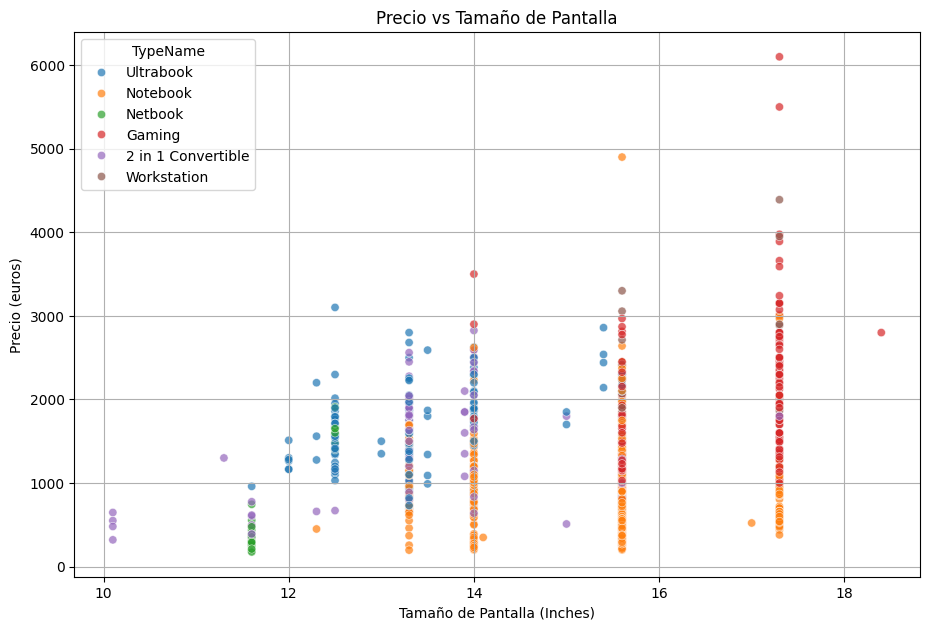

In [ ]:

# Configura el tamaño de la figura
plt.figure(figsize=(18, 12))

# Gráfico de dispersión: Precio vs Tamaño de Pantalla
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Inches', y='Price_euros', hue='TypeName', alpha=0.7)
plt.title('Precio vs Tamaño de Pantalla')
plt.xlabel('Tamaño de Pantalla (Inches)')
plt.ylabel('Precio (euros)')
plt.grid()


plt.tight_layout()# Mostrar el gráfico
plt.show()

**Tendencia**

Los consumidores, están dispuestos a pagar más por un mayor rendimiento, lo que se refleja en el precio más alto de los SSD.


El sistema operativo influye significativamente en el precio de una computadora y en la variedad de modelos disponibles. macOS se posiciona como la opción más costosa, mientras que Linux y Android son más económicas. Windows 10 ofrece un amplio espectro de precios, adaptándose a diferentes necesidades y presupuestos.
los valores atípicos pueden corresponder a modelos de computadora con características muy especiales o a ofertas promocionales.

El analisis de acuerdo con este grafico es que cada sistema operativo atrae a un segmento de mercado diferente en función del precio y las características.
Los sistemas operativos más caros suelen ofrecer características y rendimiento superiores.
Opciones para el consumidor: Los usuarios pueden elegir entre una amplia gama de opciones de acuerdo a sus necesidades y presupuesto.

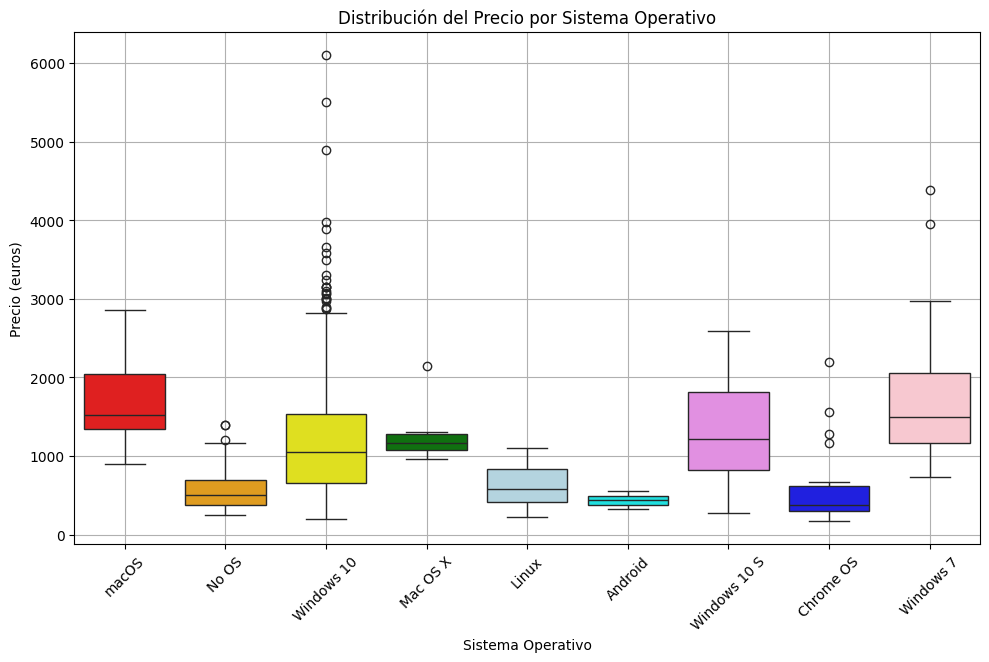

In [ ]:

custom_palette = ['red', 'orange', 'yellow', 'green', 'lightblue', 'cyan', 'violet', 'blue', 'pink']# paleta de colores

plt.figure(figsize=(10, 12)) #Tamaño
plt.subplot(2, 1, 1)# Crear un subplot


sns.boxplot(data=df, x='OS', y='Price_euros', palette=custom_palette)# grafico de caja utilizando la paleta personalizada


plt.title('Distribución del Precio por Sistema Operativo')# título y etiquetas
plt.xlabel('Sistema Operativo')
plt.ylabel('Precio (euros)')

plt.xticks(rotation=45) # Rotar etiquetas del eje X

plt.grid()# Añadir cuadrícula

plt.tight_layout()# Mostrar el gráfico
plt.show()

TOP 5

Las empresas Dell y Lenovo ocupan los dos primeros lugares, lo que indica que son las que más productos han vendido y tienen una mayor participación en el mercado. HP se ubica en el tercer lugar. A partir del cuarto lugar (Asus), se observa una disminución significativa en la cantidad de productos vendidos en comparación con los tres primeros. Existe una fuerte competencia entre las empresas, especialmente entre las tres primeras. Las empresas ubicadas en los últimos lugares podrían estar enfocadas en nichos de mercado específicos o en productos de alta gama.

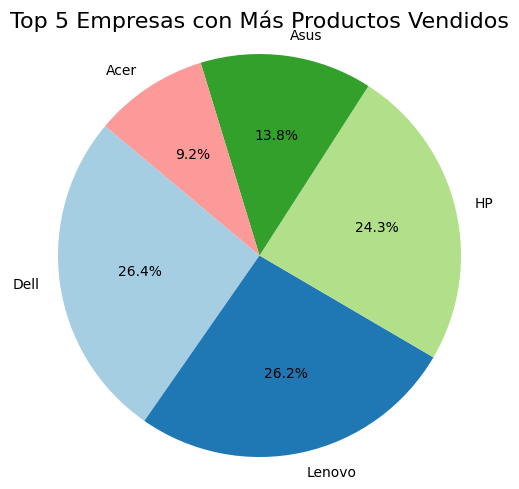

In [ ]:
# Agrupar por 'Company' y contar el número de productos
ventas_por_empresa = df['Company'].value_counts()

# Seleccionar las 10 empresas con más ventas
top_empresas = ventas_por_empresa.head(5)

# Crear el gráfico de tortas
plt.figure(figsize=(5, 5))
plt.pie(top_empresas, labels=top_empresas.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Top 5 Empresas con Más Productos Vendidos', fontsize=16)

plt.axis('equal')  # Grafico sea un círculo
plt.tight_layout()
plt.show()

Mapa de calor
El precio de un dispositivo parece estar fuertemente influenciado por el peso, la cantidad de RAM y la capacidad de almacenamiento.

El tamaño de la pantalla (medido en pulgadas) también influye en el peso del dispositivo. La capacidad de almacenamiento secundario y la frecuencia del procesador también tienen cierta influencia en el precio, aunque en menor medida.

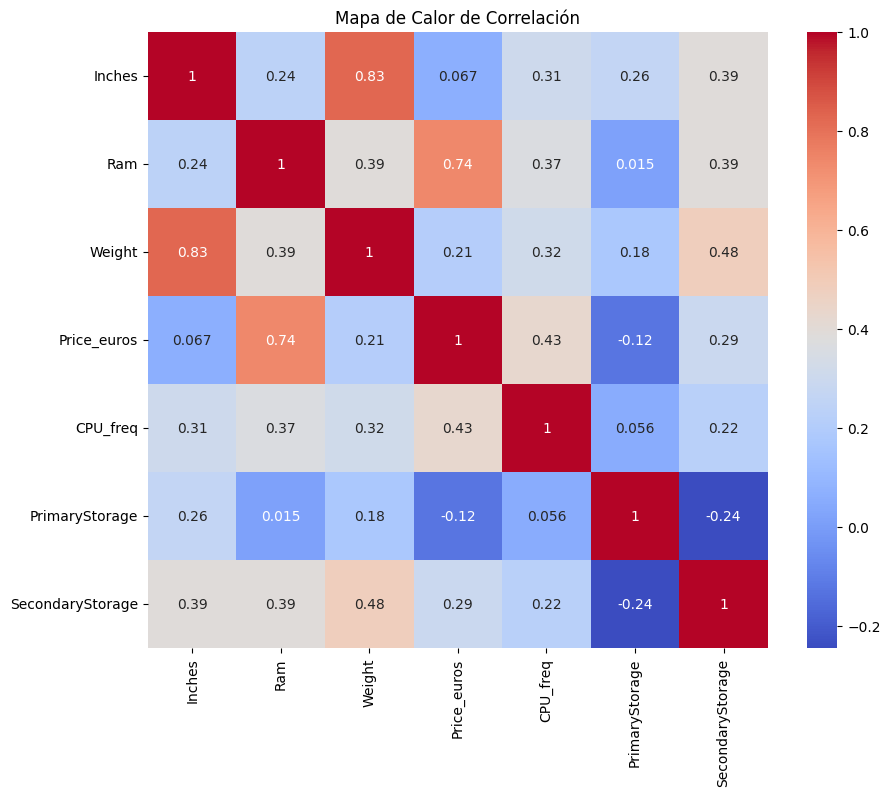

In [ ]:
numerical_features = ['Inches', 'Ram', 'Weight', 'Price_euros', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']# Seleccionar las columnas numéricas de interés


correlation_matrix = df[numerical_features].corr()# matriz de correlación


plt.figure(figsize=(10, 8))# mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Resultado de mi model

In [ ]:
#error cuadratico medio
X = df[['Inches', 'Ram', 'Weight', 'Price_euros', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]
y = df['Price_euros']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Dividir los datos en entrenamiento y prueba

model = LinearRegression()# Crear y entrenar  el modelo
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Hacer predicciones

mse = mean_squared_error(y_test, y_pred) # Evaluar el modelo (ejemplo: error cuadrático medio)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 2.1229131721140147e-25


El resultado final indica que el modelo tiene un error cuadrático medio muy bajo (cercano a cero), lo que sugiere un ajuste excelente a los datos.

In [ ]:
X = df[['Inches', 'Ram', 'Weight', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]
y = df['Price_euros']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Dividir los datos en entrenamiento y prueba

model = LinearRegression()# Crear y entrenar el modelo
model.fit(X_train, y_train)


y_pred = model.predict(X_test) #predicion


mse = mean_squared_error(y_test, y_pred) # Evaluar el modelo (error cuadrático medio)
print("Error cuadrático medio:", mse)


new_device = [[15.6, 16, 2.5, 2.5, 512, 1024]]  # Ejemplo de una nueva configuración
predicted_price = model.predict(new_device)
print("Precio predicho:", predicted_price)

Error cuadrático medio: 168682.16690831704
Precio predicho: [1850.36313632]


 El modelo de regresión lineal ha encontrado una relación matemática entre las características del dispositivo (RAM, almacenamiento, etc.) y su precio.

La precisión del modelo puede ser mejorada; un ECM de 168682 sugiere que hay margen de mejora en la precisión del modelo.

In [ ]:
X = df[['Ram', 'PrimaryStorage', 'Weight']]  # Características
y = df['Price_euros']  # Precio


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Dividir los datos


model = LinearRegression() # Crear y entrenar el modelo
model.fit(X_train, y_train)

# Predecir el precio de un nuevo dispositivo
new_device = [[8, 256, 6.1]]  # Ejemplo de una nueva configuración
predicted_price = model.predict(new_device)
print("Precio predicho:", predicted_price)

Precio predicho: [875.95569539]


##H5
 Hipotesis Final Prediccion de precios
Se ha entrenado un modelo de regresión lineal para predecir el precio de un dispositivo electrónico basado en sus características de Ram, weight, PrimaryStorage. El modelo ha generado una predicción de 875.96 euros. Lo cual invalida mi hipotesis de que el precio estaria unos puntos mas arriba de los 1000 Euros.


#Conclusion final

Los consumidores de dispositivos electrónicos buscan productos que ofrezcan un buen equilibrio entre rendimiento, tamaño y precio. Factores a tener en cuenta al comercializar los productos.

Ademas suelen estar dispuestos a pagar más por dispositivos con mayor capacidad de procesamiento (CPU), más memoria RAM y mayor capacidad de almacenamiento, ya que esto se traduce en un mejor rendimiento y una experiencia de usuario más fluida.

Existe una tendencia a buscar dispositivos más ligeros, lo que sugiere que la portabilidad es un factor importante a la hora de elegir un dispositivo. Los consumidores buscan un equilibrio entre rendimiento y tamaño. Desean dispositivos potentes pero también portátiles. Este indicador plantea desafíos de diseño para las empresas.
A pesar de valorar el rendimiento, los consumidores también son conscientes del precio y buscan opciones que se ajusten a su presupuesto.

Como futura primera inversion teniendo en cuenta el trabajo desarrollado me enfocare principalmente en los notebooks, complementando mi stock con gaming y ultrabooks.


